# **Milestone 2**

## **Model Building - Approach**
1. Data preparation - Exclude Outliers and Binary Flags
2. Partition the data into train and test set
3. Fit on the train data
4. Tune the model and prune the tree, if required
5. Test the model on test set

## **Import Cleaned Data and Packages**

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

In [75]:
hm = pd.read_csv("data_cleaned.csv")
hm.head(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,...,VALUE_missing_values_flag,REASON_missing_values_flag,JOB_missing_values_flag,YOJ_missing_values_flag,DEROG_missing_values_flag,DELINQ_missing_values_flag,CLAGE_missing_values_flag,NINQ_missing_values_flag,CLNO_missing_values_flag,DEBTINC_missing_values_flag
0,1,1100.0,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,...,False,False,False,False,False,False,False,False,False,True
1,1,1300.0,70053.0,68400.0,HomeImp,Other,7.0,0.0,0.0,121.833333,...,False,False,False,False,False,False,False,False,False,True
2,1,1500.0,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,...,False,False,False,False,False,False,False,False,False,True
3,1,1500.0,65019.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,...,True,True,True,True,True,True,True,True,True,True
4,0,1700.0,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,...,False,False,False,False,False,False,False,False,False,True
5,1,1700.0,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,...,False,False,False,False,False,False,False,False,False,False
6,1,1800.0,48649.0,57037.0,HomeImp,Other,5.0,0.0,0.0,77.100000,...,False,False,False,False,False,False,False,False,False,True
7,1,1800.0,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,...,False,False,False,False,False,False,False,False,False,False
8,1,2000.0,32700.0,46740.0,HomeImp,Other,3.0,0.0,0.0,216.933333,...,False,False,False,False,False,False,False,False,False,True
9,1,2000.0,65019.0,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,...,False,False,False,False,False,False,False,False,False,True


In [76]:
data = hm.copy()

## **Data Preparation**

### **Separating the target variable from other variables**

In [77]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
X = data.drop(columns = 'BAD')

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
X = pd.get_dummies(X, drop_first = True)

# Create y(dependent varibale)
y = data['BAD']

In [78]:
X.head(5)

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,...,CLAGE_missing_values_flag,NINQ_missing_values_flag,CLNO_missing_values_flag,DEBTINC_missing_values_flag,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1100.0,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262,...,False,False,False,True,1,0,1,0,0,0
1,1300.0,70053.0,68400.0,7.0,0.0,0.0,121.833333,0.0,14.0,34.818262,...,False,False,False,True,1,0,1,0,0,0
2,1500.0,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262,...,False,False,False,True,1,0,1,0,0,0
3,1500.0,65019.0,89235.5,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262,...,True,True,True,True,0,0,1,0,0,0
4,1700.0,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262,...,False,False,False,True,1,1,0,0,0,0


### **Splitting the data into 70% train and 30% test set**

In [79]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

### **Think about it** 
- You can try different splits like 70:30 or 80:20 as per your choice. Does this change in split affect the performance?
- If the data is imbalanced, can you make the split more balanced and if yes, how?

1. Split with too much training set may lead to overfitting of model and cause the model trained to be not very effective. Vice versa, too little training set can lead to underfitting.


2. Resample techniques like Under-sampling abundant class or over-sampling insufficient data are needed to deal with imbalance data. Oversampling techniques includes repetition, bootstrapping or SMOTE (Synthetic Minority Over-Sampling Technique).

## **Model Evaluation Criterion**

#### After understanding the problem statement, think about which evaluation metrics to consider and why. 

In [80]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Build a Logistic Regression Model** 

In [81]:
# Defining the Logistic regression model
lr = LogisticRegression(penalty = 'none')

# Fitting the model on the training data 
lr.fit(X_train, y_train)

LogisticRegression(penalty='none')

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      3355
           1       0.57      0.04      0.07       817

    accuracy                           0.81      4172
   macro avg       0.69      0.51      0.48      4172
weighted avg       0.76      0.81      0.73      4172



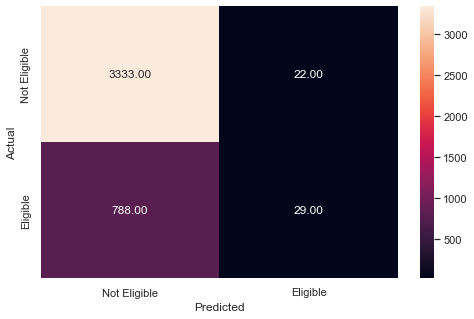

In [82]:
#Predict for train set
train_pred = lr.predict(X_train)

#checking the performance on the train dataset
metrics_score(y_train, train_pred)

In [83]:
#For L1 regularized Regression, we have to Standardize the data
# from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
# X_scaled=(X - X.mean()) / X.std()
X1_train, X1_test, y1_train, y1_test = train_test_split(X_scaled, y, test_size = 0.30, random_state = 1)

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      3355
           1       0.72      0.61      0.66       817

    accuracy                           0.88      4172
   macro avg       0.82      0.78      0.79      4172
weighted avg       0.87      0.88      0.87      4172



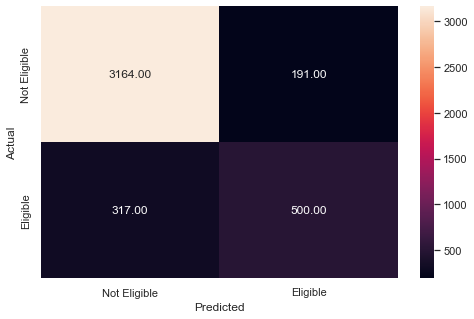

In [84]:
#l1 regularized regression with cross-validation
lrm = LogisticRegression(penalty="l1",solver="liblinear")
lrm.fit(X1_train, y1_train)
train_pred = lrm.predict(X1_train)

#checking the performance on the train dataset
metrics_score(y1_train, train_pred)

- From the confusion matrix and evaluation scores, we can see that logistic regression with l1 regularization avoid overfitting (recall < 1) while having a higher precision than no-penalty regression(No. of true positives divided by total positive predictions)


- Recall shows the proportion of actual value correctedly predicted by our model. If recall is equal to 1, then our model correctedly predict all the actual y_train value which may indicate overfitting.

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1416
           1       0.77      0.58      0.66       372

    accuracy                           0.88      1788
   macro avg       0.83      0.77      0.79      1788
weighted avg       0.87      0.88      0.87      1788



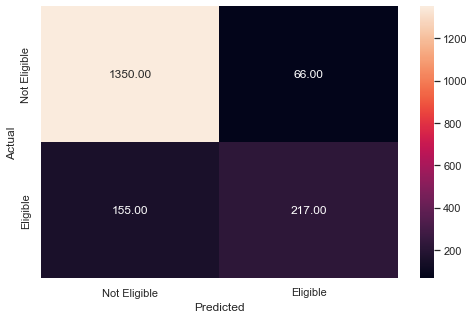

Score for Train DataSet
               precision    recall  f1-score   support

           0       0.91      0.94      0.93      3355
           1       0.72      0.61      0.66       817

    accuracy                           0.88      4172
   macro avg       0.82      0.78      0.79      4172
weighted avg       0.87      0.88      0.87      4172



In [85]:
#Predict for test set
test_pred = lrm.predict(X1_test)

#checking the performance on the test dataset
metrics_score(y1_test, test_pred)
print("Score for Train DataSet\n", classification_report(y_train, train_pred))

**Observations: __________**
- From the recall, its only 0.58, indicating only 58% of actual eligible clients are predicted by the model.


- The precision on the test data suggests that there's a 23% (1 - 0.77) chance that the model will predict that a person is not eligible but turn out to be eligible, and the company may waste their time and energy on these people who are not going to be converted.


- The precision answer the question "What proportion of positive identifications was actually correct?". The recall answer the question "What proportion of actual positives was identified correctly?" In this case, 77% of predicted converted is actually correct.

#### Let's check the coefficients, and check which variables are important and how they affect the process of loan approval

In [107]:
# Printing the coefficients of logistic regression
print("Coefficients:\n",lrm.coef_)

coef_abs = np.abs(lrm.coef_)
max_coefs = np.max(coef_abs,axis=0)
features=np.argpartition(max_coefs, -10)[-10:]

print("\nTop 8 Features:",[i for i in X.columns[features]])
print("Top 8 Features' Coefficient:",[round(i,3) for i in lrm.coef_[0][features]])

Coefficients:
 [[-0.04715285 -0.03163162 -0.05003609 -0.07446377  0.          0.
  -0.45714938  0.26280591  0.02493997  0.7306344   0.00975238  0.65408876
   0.04271267 -0.44059942 -0.18108166 -0.39546029 -0.2639452   0.24511801
   0.02158431  0.3136229   1.15291058  0.08569262 -0.19142181 -0.01504387
  -0.12828767  0.15285156  0.03529649]]

Top 8 Features: ['CLAGE_missing_values_flag', 'NINQ', 'DELINQ_missing_values_flag', 'CLNO_missing_values_flag', 'DEROG_missing_values_flag', 'JOB_missing_values_flag', 'DEBTINC_missing_values_flag', 'VALUE_missing_values_flag', 'CLAGE', 'DEBTINC']
Top 8 Features' Coefficient: [0.245, 0.263, -0.264, 0.314, -0.395, -0.441, 1.153, 0.654, -0.457, 0.731]


**Insights**
- Most Important Varialbes are: 'CLAGE_missing_values_flag', 'NINQ', 'DELINQ_missing_values_flag', 'CLNO_missing_values_flag', 'DEROG_missing_values_flag', 'JOB_missing_values_flag', 'DEBTINC_missing_values_flag', 'VALUE_missing_values_flag', 'CLAGE', 'DEBTINC'.

### **Think about it:**
- The above Logistic regression model was build on the threshold of 0.5, can we use different threshold?
- How to get an optimal threshold and which curve will help you achieve?
- How does, accuracy, precision and recall change on the threshold?

- Yes the recall for score 1 is much lower than 0, showing strong imbalance of dataset


- ROC (Receiver Operating Characteristic) curve will help us acheive the best threshold. The optimal threshold is achieved when 𝑇𝑃𝑅, True Positive Rate, minus 𝐹𝑃𝑅, False Positive Rate, is maximized. Use fpr, tpr, thresholds = roc_curve(y, y_scores) to find the fpr and tpr 


- Another way is to use Recall and Precision plot and find the threshold level that gives optimum F1 score

- There is an inverse relationship between precision and recall

<img src='1_6BCizOZ2qvWSjVo88ChOzw.png' style="Width:400px;height:400px"/>

### **Build a Decision Tree Model**

### **Think about it:**
- In Logistic regression we treated the outliers and built the model, should we do the same for tree based models or not? If not, why?

#### Data Preparation for the tree based model

In [93]:
# Add binary flags
# List of columns that has missing values in it
missing_col = [col for col in data.columns if data[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(data,colmn)

In [94]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = data.select_dtypes('number')

# Select string and object columns.
cat_data = data.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.
data[num_data.columns] = num_data.fillna(data[num_data.columns].median())

# Fill object columns with model.
for column in cat_data:
    mode = data[column].mode()[0]
    data[column] = data[column].fillna(mode)

#### Separating the target variable y and independent variable x

In [95]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
X = data.drop(columns = 'BAD')

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
X = pd.get_dummies(X, drop_first = True)

# Create y(dependent varibale)
y = data['BAD']

#### Split the data

In [96]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [97]:
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}
d_tree =  DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8})

In [98]:
#fitting Decision tree model
d_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8})

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



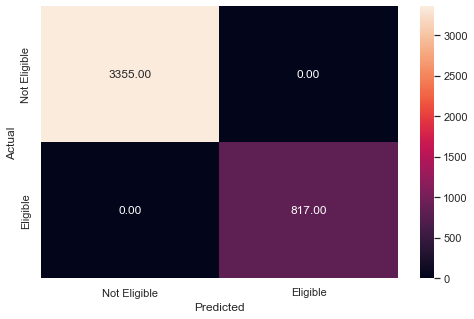

In [99]:
# Checking performance on the training data
y_pred_train = d_tree.predict(X_train)

metrics_score(y_train, y_pred_train)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1416
           1       0.68      0.57      0.62       372

    accuracy                           0.86      1788
   macro avg       0.79      0.75      0.77      1788
weighted avg       0.85      0.86      0.85      1788



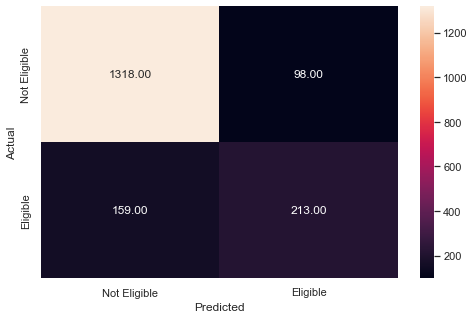

In [100]:
# Checking performance on the testing data
y_pred_test = d_tree.predict(X_test)

metrics_score(y_test, y_pred_test)

**Insights**
- The Decision Tree works so well on the training data that recall and precision are all 1. However, it performs not so well on the test data as the recall is 0.61 in comparison to 1 for the training dataset. Therefore, the Decision Tree is overfitting the training data.


- The precision on the test data suggests there's a 30% (1 - 0.7) chance that the model will predict that a person is going to be eligible but turn out to be not


- Only 70% of predicted eligible is actually correct. Also, the model only identify correctly 61% of actual eligible clients.

### **Think about it:**
- Can we improve this model? 
- How to get optimal parameters in order to get the best possible results?

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


#### Using GridSearchCV for Hyperparameter tuning on the model

In [111]:
# Choose the type of classifier. 
d_tree_tuned = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state= 5)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(10, 20), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [20, 21, 22, 23, 24, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

# Fit the GridSearch on train dataset
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=14,
                       min_samples_leaf=22, random_state=5)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      3355
           1       0.57      0.88      0.69       817

    accuracy                           0.84      4172
   macro avg       0.77      0.86      0.79      4172
weighted avg       0.89      0.84      0.86      4172



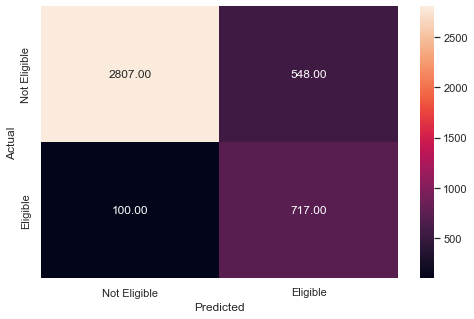

In [112]:
# Checking performance on the training data based on the tuned model
y_pred_train2 = d_tree_tuned.predict(X_train)

metrics_score(y_train, y_pred_train2)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.83      0.88      1416
           1       0.54      0.77      0.64       372

    accuracy                           0.82      1788
   macro avg       0.74      0.80      0.76      1788
weighted avg       0.85      0.82      0.83      1788



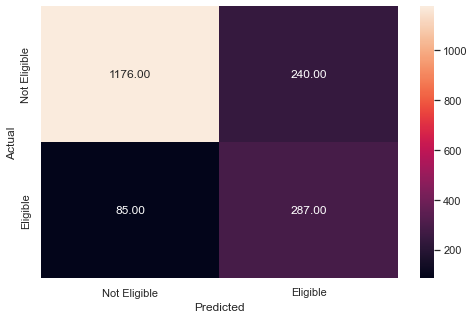

Report of Model_1 is 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      1416
           1       0.68      0.57      0.62       372

    accuracy                           0.86      1788
   macro avg       0.79      0.75      0.77      1788
weighted avg       0.85      0.86      0.85      1788



In [113]:
# Checking performance on the testing data based on the tuned model
y_pred_test2 = d_tree_tuned.predict(X_test)

metrics_score(y_test, y_pred_test2)
print("Report of Model_1 is \n", classification_report(y_test, y_pred_test))

**Insights**
- Compared to Model_1, tuned model has a higher recall on model_1 and lower precision, f1 score is similar. This model is not overfitting the training data and giving approximately the same result on the test and train datasets. Recall is 0.77 for test vs 0.88 for train. The model also has a much higher recall than the model_1. However, the model perform worse on precision with only 54% of Eligible prediction correct.


- This shows that the tuned model capture 77% of eligible clients while predicting some non-eligible clients as eligible. Given that the bank want as few default clients as possible, recall, the fraction of relevant instances that were predicted by model, needs to be as high as possible. A model with high recall, despite lower precision allows the bank to holistically capture as many risky clients as possible, sacrificing the loss of some non-default clients.

#### Plotting the Decision Tree

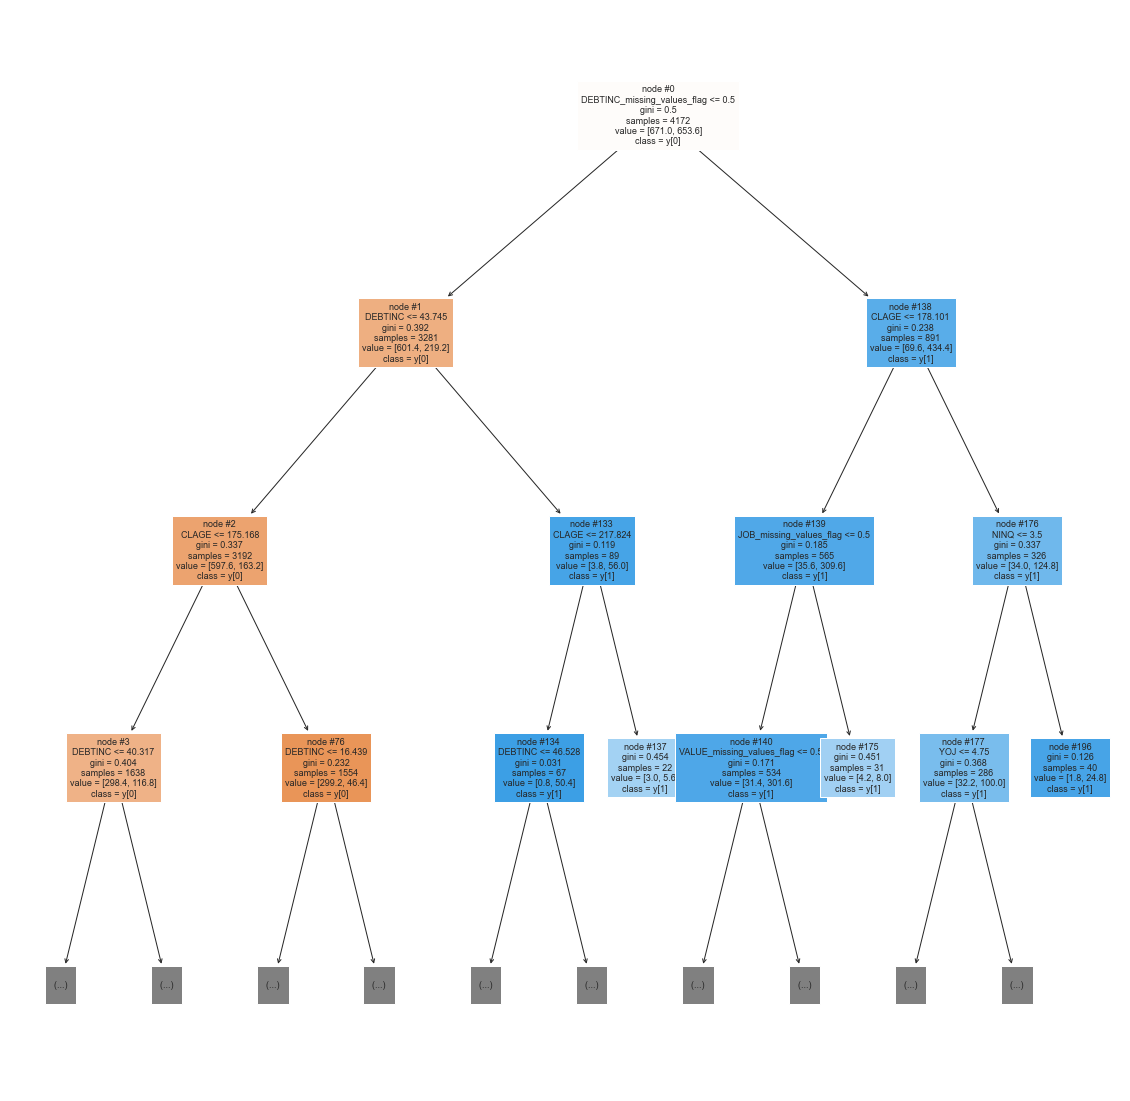

In [114]:
# Plot the decision tree and analyze it to build the decision rule
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True, max_depth = 3)

plt.show()

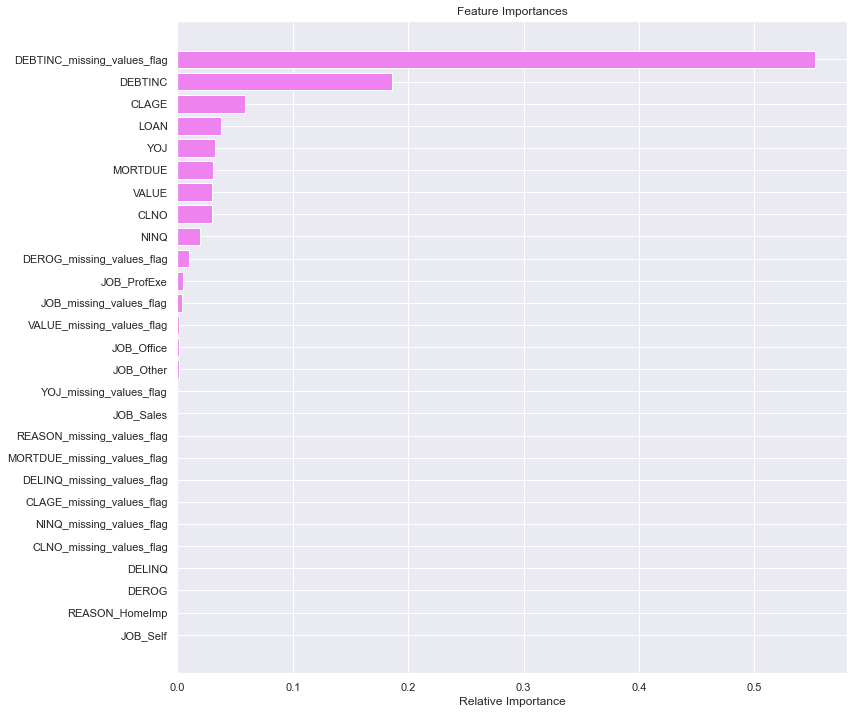

In [115]:
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

#### Deduce the business rules apparent from the Decision Tree and write them down:
- **If clients do not disclose their Debt-to-Income ratio**, they are more likely to default


- **If clients have a Debt-to-income ratio < 44**, they are less likely to default


- **If clients have more than 44 Debt-to-income ratio and less than 220 month of account history**, they are more likely to default


- **If clients do not disclose debt-to-income ratio, job type and have an account history of less than 170 months**, they are likely to default

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [116]:
# Defining Random forest CLassifier
rf_estimator = RandomForestClassifier()

rf_estimator.fit(X_train, y_train)

RandomForestClassifier()

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



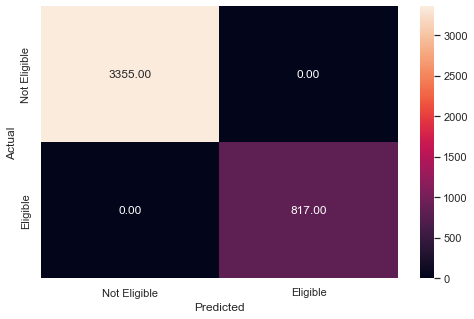

In [117]:
#Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train3)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1416
           1       0.81      0.65      0.72       372

    accuracy                           0.89      1788
   macro avg       0.86      0.80      0.83      1788
weighted avg       0.89      0.89      0.89      1788



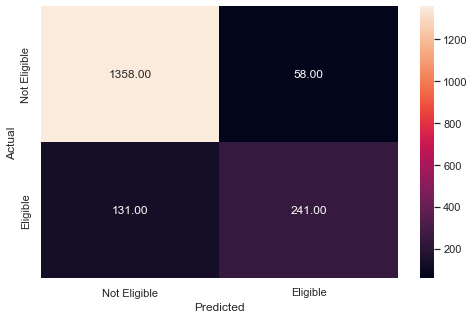

In [118]:
# Checking performance on the test data
y_pred_test3 = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test3)

**Observations:**
- The Random Forest classifier seems to be overfitting the training data. The recall on the training data is 1, while the recall on the test data is only ~ 0.64 for class 1.

- Precision is high for the test data.

### **Build a Random Forest model with Class Weights**

In [119]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}
rf_estimator1 = RandomForestClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)

# Fitting Random Forest model
rf_estimator1.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



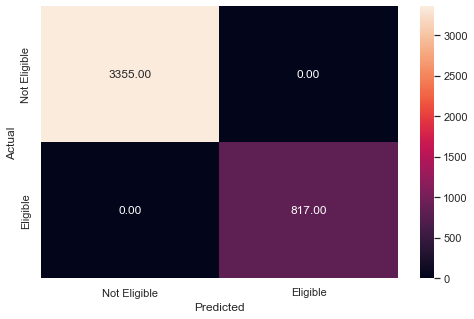

In [120]:
# Checking performance on the train data
y_pred_train4 = rf_estimator1.predict(X_train)

metrics_score(y_train, y_pred_train4)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1416
           1       0.82      0.64      0.72       372

    accuracy                           0.90      1788
   macro avg       0.87      0.80      0.83      1788
weighted avg       0.89      0.90      0.89      1788



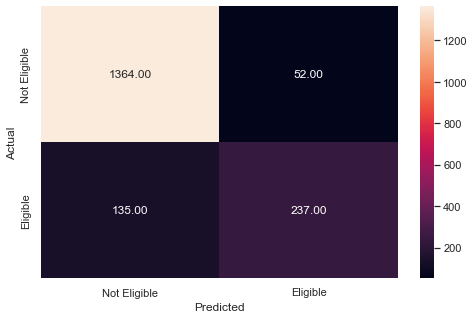

In [121]:
# Checking performance on the test data
y_pred_test4 = rf_estimator1.predict(X_test)

metrics_score(y_test, y_pred_test4)

### **Think about it:**
- Can we try different weights?
- If yes, should we increase or decrease class weights for different classes? 

### **Tuning the Random Forest**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.


**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node:

**min_samples_leaf**: The minimum number of samples required to be at a leaf node. 

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

You can learn more about Random Forest Hyperparameters from the link given below and try to tune them

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#### **Warning:** This may take a long time depending on the parameters you tune. 

In [1]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", min_samples_leaf = 35, random_state = 7)


# Grid of parameters to choose from
parameters = {"n_estimators": [90,100,105,110],
    "max_depth": [3,4],
    "max_features": [0.6,0.7,0.8]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

#fit the GridSearch on train dataset
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

NameError: name 'RandomForestClassifier' is not defined

In [128]:
# Fit the best algorithm to the data. 
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, max_features=0.7,
                       min_samples_leaf=35, n_estimators=110, random_state=7)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3355
           1       0.67      0.69      0.68       817

    accuracy                           0.87      4172
   macro avg       0.80      0.81      0.80      4172
weighted avg       0.88      0.87      0.87      4172



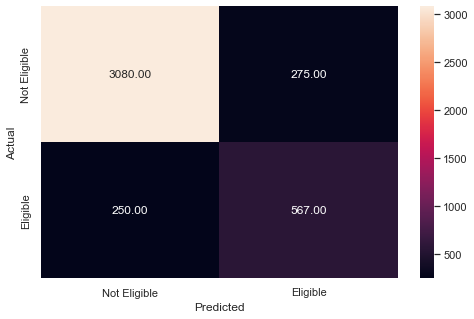

In [129]:
# Checking performance on the training data
y_pred_train5 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train5)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1416
           1       0.71      0.65      0.68       372

    accuracy                           0.87      1788
   macro avg       0.81      0.79      0.80      1788
weighted avg       0.87      0.87      0.87      1788



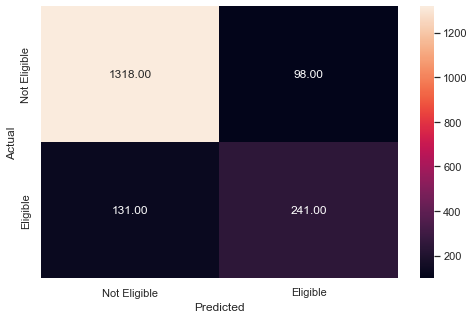

In [130]:
# Checking performace on test dataset
y_pred_test5 = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test5)

**Insights:**
- The tuned model reduce significantly the overfitting issue, but it does not have a high recall, only 0.66.
- However, the model did a very good job on class 0, with recall 0.94 and precision 0.91 on test set
- The model does not overfit much and predict class 0 well but not well on class 1. Therefore we should trust its prediction on class 0 more than the class 1.
- The Company want the recall to be maximized. The greater the Recall score, the higher the chances of minimizing False Negatives. The higher the chance that the company can capture as many risky clients as possible.

#### Plot the Feature importance of the tuned Random Forest

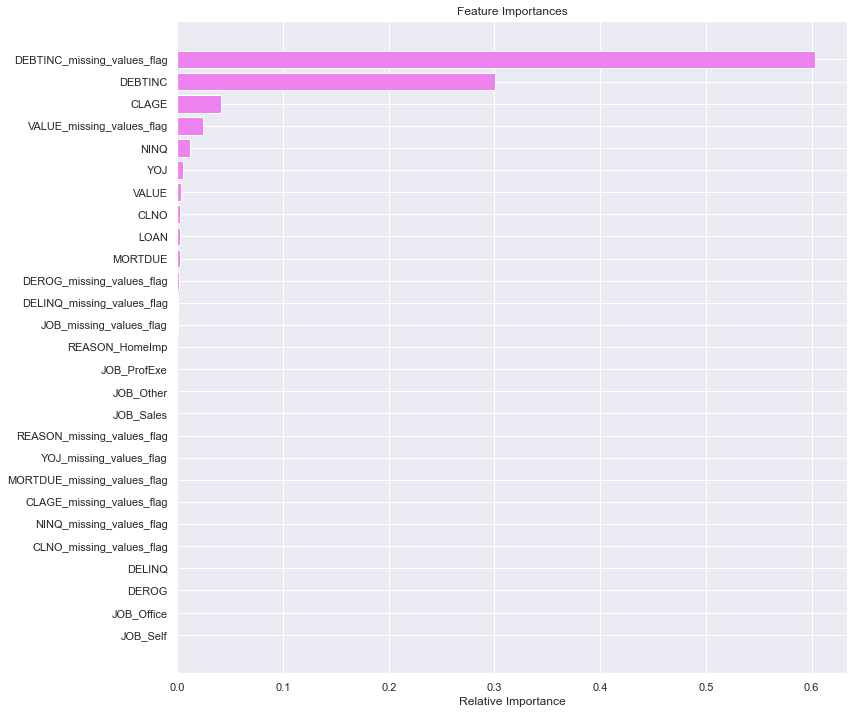

In [131]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

### **Think about it:**
- We have only built 3 models so far, Logistic Regression, Decision Tree and Random Forest 
- We can build other Machine Learning classification models like kNN, LDA, QDA or even Support Vector Machines (SVM).
- Can we also perform feature engineering and create model features and build a more robust and accurate model for this problem statement? 

### **Comparing Model Performances**

In [132]:
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [133]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [134]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [135]:
# Make the list of all the model names 

models = [lr,lrm,d_tree,d_tree_tuned,rf_estimator,rf_estimator1,rf_estimator_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [157]:
# Mention the Model names in the list. for example 'Model': ['Decision Tree', 'Tuned Decision Tree'..... write tht names of all model built]

comparison_frame = pd.DataFrame({'Model':["LogisticRegression(No Penalty)","LogisticRegression('l1')",
                                          "DecisionTree","DecisionTree_Tuned","Random Forest(Default)","Random Forest(class_weight)",
                                          "Random Forest_Tuned"], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 

comparison_frame.iloc[1,[1,2,3,4,5,6]] = [0.88, 0.88, 0.61, 0.58, 0.77,0.72]
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,LogisticRegression(No Penalty),0.805849,0.793065,0.035496,0.026882,0.568627,0.555556
1,LogisticRegression('l1'),0.880000,0.880000,0.610000,0.580000,0.770000,0.720000
2,DecisionTree,1.000000,0.856264,1.000000,0.572581,1.000000,0.684887
3,DecisionTree_Tuned,0.844679,0.818233,0.877601,0.771505,0.566798,0.544592
4,Random Forest(Default),1.000000,0.894295,1.000000,0.647849,1.000000,0.806020
5,Random Forest(class_weight),1.000000,0.895414,1.000000,0.637097,1.000000,0.820069
6,Random Forest_Tuned,0.874161,0.871924,0.694002,0.647849,0.673397,0.710914


**Insights:**
- From the Summary Table, The model with the **highest Test Accuracy is Random Forest(Default), highest Test_Recall is DecisionTree_Tuned, highest Test_Precision is Random Forest(Default).** 


- Banks want to **maximize recall** for the model needs to identify as many risky clients as possible, even if the precision of the prediction is not very high. Therefore, **tuned decision tree may be the best model. The next best model is random forest_tuned**, the model has decent recall (0.66) and much better precision and accuracy than tuned decision tree. The tuned random forest model also avoid overfitting problem.

**1. Refined insights -** What are the most meaningful insights from the data relevant to the problem?

- Models indicates that the most important factors to consider when determine the default risk of a clients are: Debt-to-income Ratio, Number of Delinquent Accounts, Age of the oldest credit line in months, Job experience, whether there is a derogatory reports.

**2. Comparison of various techniques and their relative performance -** How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

- Decision Tree seems to perform better overall on recall while random forest better on accuracy and precision.


- Logistic regression does not perform well. The model can be improved if we consider imbalance sample effect and other regularization measures.


- Due to the calculation power limitation, we did not tune a lot of hyperparameters with random forest model and we can in the future find the best hyperparameters.


- We can also use other models like SVM and KNN to improve the chance of finding the best model

**3. Proposal for the final solution design -** What model do you propose to be adopted? Why is this the best solution to adopt?

- I purpose to adopt tuned decision tree model. Although the precision is lower, 55% of time the predicted risky clients indeed default, this model can capture 80%+ clients that actually default. Banks can use this model as a good starting point to identify risky clients/applications and conduct more precised research on them.


- The bank can also adopt the tuned random forest model. The model can predict 65% acutal defaulted clients, with a total prediction accuracy of more than 76%. Although the model identify 15% fewer risky client than the decision tree model, the precision is 0.76, much higher than the decision tree. Banks may sacrifice some prediction comprehensiveness in exchange for higher precision and cost-saving.